In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import copy
import skimage.morphology as sm
import matplotlib.pyplot as plt
import scipy as sp
import skimage
import pandas as pd
import copy

In [2]:
def centroid(img):
    dict1={}
    list1=[]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]!=0:
                if img[i][j] not in dict1:
                    dict1[img[i][j]]=[i,i,j,j]
                else:
                    dict1[img[i][j]][0]=min(dict1[img[i][j]][0],i)
                    dict1[img[i][j]][1]=max(dict1[img[i][j]][1],i)
                    dict1[img[i][j]][2]=min(dict1[img[i][j]][2],j)
                    dict1[img[i][j]][3]=max(dict1[img[i][j]][3],j)
    for i in dict1:
        a=((dict1[i][1]-dict1[i][0])/2,dict1[i][3]-dict1[i][2]/2)
        list1.append(a)
    return list1

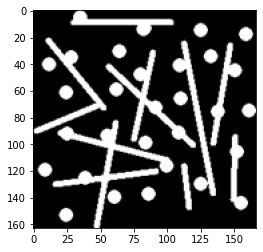

In [3]:
img = plt.imread('circles_lines.jpg') # Read an image
plt.imshow(img) # Show the original image
plt.show()

In [4]:
new_img=[]
for i in range(img.shape[0]):
    temp=[]
    for j in range(img.shape[1]):
        temp.append(img[i][j][0])
    new_img.append(temp)
new_img=np.array(new_img)               

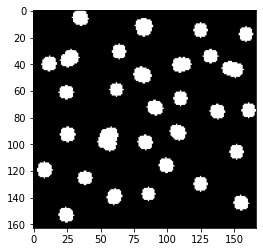

In [5]:
dst=sm.binary_opening(new_img,sm.disk(5))
plt.imshow(dst,cmap="gray") 
plt.show()

In [6]:
dst_show=copy.deepcopy(dst)

In [7]:
label=sp.ndimage.measurements.label(dst)
label=np.array(label)
print("total feature is",label[1])

total feature is 30


C:\Users\huafe\AppData\Local\Temp/ipykernel_6828/3360281688.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  label=np.array(label)


In [10]:
area_list=centroid(label[0])
areas=[i for i in range(1,31)]
pd.DataFrame({"centroids":area_list,"areas":areas})

,centroids,areas
0,"(5.5, 26.5)",1
1,"(6.5, 51.0)",2
2,"(5.5, 70.0)",3
3,"(5.5, 87.0)",4
4,"(5.5, 39.5)",5
5,"(6.5, 24.0)",6
6,"(5.0, 74.5)",7
7,"(5.5, 14.0)",8
8,"(5.5, 66.0)",9
9,"(6.0, 86.5)",10


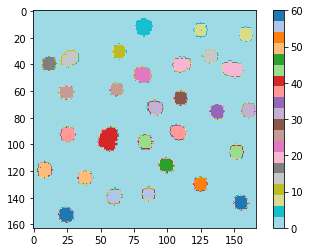

In [23]:
plt.imshow(label[0],cmap='tab20_r')#viridis_r
plt.colorbar()
plt.show()

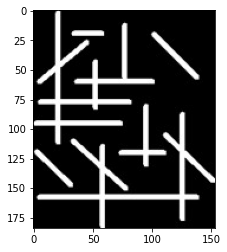

In [11]:
img2 = plt.imread('lines.jpg') # Read an image
plt.imshow(img2) # Show the original image
plt.show()

In [12]:
new_img2=[]
for i in range(img2.shape[0]):
    temp=[]
    for j in range(img2.shape[1]):
        temp.append(img2[i][j][0])
    new_img2.append(temp)
new_img2=np.array(new_img2)  

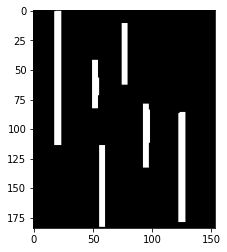

In [13]:
dst2=sm.binary_opening(new_img2,sm.rectangle(10,5))
plt.imshow(dst2,cmap="gray") 
plt.show()

In [14]:
label2=sp.ndimage.measurements.label(dst2)
label2=np.array(label2)
print("total feature is",label2[1])

total feature is 6


C:\Users\huafe\AppData\Local\Temp/ipykernel_6828/3573913518.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  label2=np.array(label2)


In [16]:
area_list2=centroid(label2[0])
areas2=[i for i in range(1,7)]
longer_dimensional=[]
for i in area_list2:
    longer_dimensional.append(max(i[0],i[1])*2)
pd.DataFrame({"centroids":area_list2,"long_dimen":longer_dimensional,"areas":areas2})

,centroids,long_dimen,areas
0,"(56.5, 14.0)",113.0,1
1,"(25.5, 41.5)",83.0,2
2,"(20.0, 30.0)",60.0,3
3,"(26.5, 51.5)",103.0,4
4,"(46.0, 66.5)",133.0,5
5,"(34.0, 32.0)",68.0,6


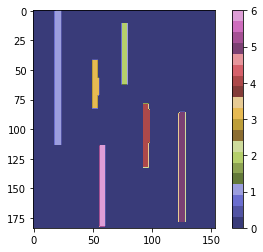

In [15]:
plt.imshow(label2[0],cmap='tab20b')#viridis_r
plt.colorbar()
plt.show()